[INFO] loading model...
[INFO] computing object detections...
[INFO] person: 99.94%
[INFO] person: 99.41%
[INFO] person: 55.16%


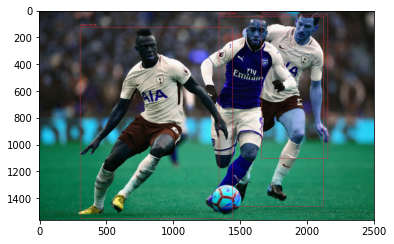

In [1]:
prototxt = "prototxt/MobileNetSSD_deploy.prototxt.txt"
model = "model/MobileNetSSD_deploy.caffemodel"
my_image = "images/example_10.jpg"
my_confidence = 0.2
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt

# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD
# implementation)
image = cv2.imread(my_image)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,
                             (300, 300), 127.5)

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in np.arange(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > my_confidence:
        # extract the index of the class label from the `detections`,
        # then compute the (x, y)-coordinates of the bounding box for
        # the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # display the prediction
        label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
        print("[INFO] {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),
                      COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

# show the output image
plt.imshow(image)
plt.show()